## Imports

We will be using the following libraries:

* `pandas` for data loading
* `numpy` for preprocessing
* `matplotlib` / `seaborn` for data visualization
* `scipy.stats` / `statsmodels` for statistical modelling


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
pd.set_option('display.max_rows', 100)  # since the file will include more than 5000 lines we want to limit the max row number to display
from datetime import datetime
import pytz
print(datetime.today().strftime("%d-%b-%Y %a"), "Project Milestone 3 Notebook")
tz_Suisse = pytz.timezone('Europe/Zurich')
current_time= datetime.now(tz_Suisse)
print("Lausanne Time : ", current_time.strftime("%H:%M:%S"))
# The datapath is going to be a constant to reach our data 

20-Dec-2022 Tue Project Milestone 3 Notebook
Lausanne Time :  18:22:27


## Loading data

We load the data from the corresponding CSV files.

In [3]:
BeerAdvocate = pd.read_csv('./USA_Beer_Advocate.csv.zip')
# The purpose is to see the beers which have the highest number of reviews
BeerAdvocate.drop(columns='Unnamed: 0', inplace = True) 
BeerAdvocate.sort_values('beer_id', inplace = True, ascending=False) 
BeerAdvocate.head()

,beer_name,beer_id,brewery_name,brewery_id,style,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,user_location,brewery_location
1832376,Common,293285,Burgeon Beer Company,48082,Cream Ale,2017-07-24 10:00:00,Mitzvahman72,mitzvahman72.1054350,5.00,3.75,4.00,3.50,4.00,3.80,"United States, California","United States, California"
1834994,Bandwagon Hazy IPA,293281,Bastion Brewing Company,46689,American IPA,2017-07-24 10:00:00,mactrail,mactrail.311921,4.00,4.00,4.00,3.75,3.75,3.85,"United States, Washington","United States, Washington"
984418,Three Ninety Bock,293279,Boston Beer Company (Samuel Adams),35,Maibock / Helles Bock,2017-07-24 10:00:00,matcris,matcris.1043550,3.75,4.00,3.75,4.00,4.00,3.96,"United States, Arizona","United States, Massachusetts"
982380,Three Ninety Bock,293279,Boston Beer Company (Samuel Adams),35,Maibock / Helles Bock,2017-07-25 10:00:00,BEERMILER12,beermiler12.501917,4.00,4.00,3.75,4.00,4.00,3.98,"United States, Maine","United States, Massachusetts"
1834676,Old Square ESB,293274,Brieux Carré Brewing Company,49458,English Bitter,2017-07-24 10:00:00,puck1225,puck1225.1028282,3.75,3.50,3.75,3.75,3.75,3.69,"United States, Texas","United States, Louisiana"


In [4]:
RateBeer = pd.read_csv('./USA_Rate_Beer.csv.zip')
# The purpose is to see the beers which have the highest number of reviews
RateBeer.drop(columns='Unnamed: 0', inplace = True) 
RateBeer.sort_values('beer_id', inplace = True, ascending=False) 
RateBeer.head()

,beer_name,beer_id,brewery_name,brewery_id,style,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,user_location,brewery_location
1932727,OEC Artista Zynergia,536465,OEC Brewing &#40;Ordinem Ecentrici Coctores&#41;,19612,Saison,2017-07-25 10:00:00,hopdog,12252,4,8,4,8,16,4.0,"United States, Pennsylvania","United States, Connecticut"
1932876,OEC Artista Zynergia,536465,OEC Brewing &#40;Ordinem Ecentrici Coctores&#41;,19612,Saison,2017-07-28 10:00:00,DiarmaidBHK,115950,4,7,3,7,14,3.5,"United States, Pennsylvania","United States, Connecticut"
775451,Great Divide Hazy IPA,536460,Great Divide Brewing Company,292,India Pale Ale (IPA),2017-07-25 10:00:00,Ratman197,18957,4,6,5,6,13,3.4,"United States, Colorado","United States, Colorado"
2346623,Goldspot Professor Plum Saison,536459,Goldspot Brewing Company,22009,Saison,2017-07-25 10:00:00,Ratman197,18957,5,7,4,7,15,3.8,"United States, Colorado","United States, Colorado"
2361312,Broken Goblet Gyroscopes And Infrared,536452,Broken Goblet Brewing,20160,India Pale Ale (IPA),2017-07-25 10:00:00,raymow,3954,3,7,4,8,16,3.8,"United States, Pennsylvania","United States, Pennsylvania"


In [5]:
Bordering_states = {"United States, Alabama": ["United States, Florida", "United States, Georgia", "United States, Mississippi", "United States, Tennessee"],
    "United States, Alaska": [],
    "United States, Arizona": ["United States, California", "United States, Colorado", "United States, Nevada", "United States, New Mexico", "United States, Utah"],
    "United States, Arkansas": ["United States, Louisiana", "United States, Mississippi", "United States, Missouri", "United States, Oklahoma", "United States, Tennessee", "United States, Texas"],
    "United States, California": ["United States, Arizona", "United States, Nevada", "United States, Oregon"],
    "United States, Colorado": ["United States, Arizona", "United States, Kansas", "United States, Nebraska", "United States, New Mexico", "United States, Oklahoma", "United States, Utah", "United States, Wyoming"],
    "United States, Connecticut": ["United States, Massachusetts", "United States, New York", "United States, Rhode Island"],
    "United States, Delaware": ["United States, Maryland", "United States, New Jersey", "United States, Pennsylvania"],
    "United States, Florida": ["United States, Alabama", "United States, Georgia"],
    "United States, Georgia": ["United States, Alabama", "United States, Florida", "United States, North Carolina", "United States, South Carolina", "United States, Tennessee"],
    "United States, Hawaii": [],
    "United States, Idaho": ["United States, Montana", "United States, Nevada", "United States, Oregon", "United States, Utah", "United States, Washington", "United States, Wyoming"],
    "United States, Illinois": ["United States, Indiana", "United States, Iowa", "United States, Michigan", "United States, Kentucky", "United States, Missouri", "United States, Wisconsin"],
    "United States, Indiana": ["United States, Illinois", "United States, Kentucky", "United States, Michigan", "United States, Ohio"],
    "United States, Iowa": ["United States, Illinois", "United States, Minnesota", "United States, Missouri", "United States, Nebraska", "United States, South Dakota", "United States, Wisconsin"],
    "United States, Kansas": ["United States, Colorado", "United States, Missouri", "United States, Nebraska", "United States, Oklahoma"],
    "United States, Kentucky": ["United States, Illinois", "United States, Indiana", "United States, Missouri", "United States, Ohio", "United States, Tennessee", "United States, Virginia", "United States, West Virginia"],
    "United States, Louisiana": ["United States, Arkansas", "United States, Mississippi", "United States, Texas"],
    "United States, Maine": ["United States, New Hampshire"],
    "United States, Maryland": ["United States, Delaware", "United States, Pennsylvania", "United States, Virginia", "United States, West Virginia"],
    "United States, Massachusetts": ["United States, Connecticut", "United States, New Hampshire", "United States, New York", "United States, Rhode Island", "United States, Vermont"],
    "United States, Michigan": ["United States, Illinois", "United States, Indiana", "United States, Ohio", "United States, Wisconsin"],
    "United States, Minnesota": ["United States, Iowa", "United States, North Dakota","United States, South Dakota", "United States, Wisconsin"],
    "United States, Mississippi": ["United States, Alabama", "United States, Arkansas", "United States, Louisiana", "United States, Tennessee"],
    "United States, Missouri": ["United States, Arkansas", "United States, Illinois", "United States, Iowa", "United States, Kansas", "United States, Kentucky", "United States, Nebraska", "United States, Oklahoma", "United States, Tennessee"],
    "United States, Montana": ["United States, Idaho", "United States, North Dakota", "United States, South Dakota", "United States, Wyoming"],
    "United States, Nebraska": ["United States, Colorado", "United States, Iowa", "United States, Kansas", "United States, Missouri", "United States, South Dakota", "United States, Wyoming"],
    "United States, Nevada": ["United States, Arizona", "United States, California", "United States, Idaho", "United States, Oregon", "United States, Utah"],
    "United States, New Hampshire": ["United States, Maine", "United States, Massachusetts", "United States, Vermont"],
    "United States, New Jersey": ["United States, Delaware", "United States, New York", "United States, Pennsylvania"],
    "United States, New Mexico": ["United States, Arizona", "United States, Colorado", "United States, Oklahoma", "United States, Texas", "United States, Utah"],
    "United States, New York": ["United States, Connecticut", "United States, Massachusetts", "United States, New Jersey", "United States, Pennsylvania", "United States, Rhode Island", "United States, Vermont"],
    "United States, North Carolina": ["United States, Georgia", "United States, South Carolina", "United States, Tennessee", "United States, Virginia"],
    "United States, North Dakota": ["United States, Minnesota", "United States, Montana", "United States, South Dakota"],
    "United States, Ohio": ["United States, Indiana", "United States, Kentucky", "United States, Michigan", "United States, Pennsylvania", "United States, West Virginia"],
    "United States, Oklahoma": ["United States, Arkansas", "United States, Colorado", "United States, Kansas", "United States, Missouri", "United States, New Mexico", "United States, Texas"],
    "United States, Oregon": ["United States, California", "United States, Idaho", "United States, Nevada", "United States, Washington"],
    "United States, Pennsylvania": ["United States, Delaware", "United States, Maryland", "United States, New Jersey", "United States, New York", "United States, Ohio", "United States, West Virginia"],
    "United States, Rhode Island": ["United States, Connecticut", "United States, Massachusetts", "United States, New York"],
    "United States, South Carolina": ["United States, Georgia", "United States, North Carolina"],
    "United States, South Dakota": ["United States, Iowa", "United States, Minnesota", "United States, Montana", "United States, Nebraska", "United States, North Dakota", "United States, Wyoming"],
    "United States, Tennessee": ["United States, Alabama", "United States, Arkansas", "United States, Georgia", "United States, Kentucky", "United States, Mississippi", "United States, Missouri", "United States, North Carolina", "United States, Virginia"],
    "United States, Texas": ["United States, Arkansas", "United States, Louisiana", "United States, New Mexico", "United States, Oklahoma"],
    "United States, Utah": ["United States, Arizona", "United States, Colorado", "United States, Idaho", "United States, Nevada", "United States, New Mexico", "United States, Wyoming"],
    "United States, Vermont": ["United States, Massachusetts", "United States, New Hampshire", "United States, New York"],
    "United States, Virginia": ["United States, Kentucky", "United States, Maryland", "United States, North Carolina", "United States, Tennessee", "United States, West Virginia"],
    "United States, Washington": ["United States, Idaho", "United States, Oregon"],
    "United States, West Virginia": ["United States, Kentucky", "United States, Maryland", "United States, Ohio", "United States, Pennsylvania", "United States, Virginia"],
    "United States, Wisconsin": ["United States, Illinois", "United States, Iowa", "United States, Michigan", "United States, Minnesota"],
    "United States, Wyoming": ["United States, Colorado", "United States, Idaho", "United States, Montana", "United States, Nebraska", "United States, South Dakota", "United States, Utah"]
    }

## Data preprocessing:

We preprocess the data by creating new categorical attributes and standardizing the numerical attributes.

In [6]:
ba = BeerAdvocate.copy()

ba['local_review'] = ba['user_location'] == ba['brewery_location']
ba['local_review'] = ba['local_review'].astype('int')

# standardizing
# (x - min) / (max - min)
for attribute in ['appearance', 'aroma', 'palate', 'taste', 'overall']:
    ba[attribute] = (ba[attribute] - ba[attribute].min()) / (ba[attribute].max() - ba[attribute].min())

'''
Outputs 1 if the given review is about a beer made in a neighbouring state with respect to the user's state.
param row: row from dataframe
return : Outputs 1 if the state is a neighbour, 0 otherwise
'''
def neighbour_calculator(row):
    if row["brewery_location"] in Bordering_states[row["user_location"]]:
        return 1
    else:
        return 0

ba["neighbour_review"] = BeerAdvocate.apply(neighbour_calculator, axis=1)

ba

,beer_name,beer_id,brewery_name,brewery_id,style,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,user_location,brewery_location,local_review,neighbour_review
1832376,Common,293285,Burgeon Beer Company,48082,Cream Ale,2017-07-24 10:00:00,Mitzvahman72,mitzvahman72.1054350,1.0000,0.6875,0.7500,0.6250,0.7500,3.80,"United States, California","United States, California",1,0
1834994,Bandwagon Hazy IPA,293281,Bastion Brewing Company,46689,American IPA,2017-07-24 10:00:00,mactrail,mactrail.311921,0.7500,0.7500,0.7500,0.6875,0.6875,3.85,"United States, Washington","United States, Washington",1,0
984418,Three Ninety Bock,293279,Boston Beer Company (Samuel Adams),35,Maibock / Helles Bock,2017-07-24 10:00:00,matcris,matcris.1043550,0.6875,0.7500,0.6875,0.7500,0.7500,3.96,"United States, Arizona","United States, Massachusetts",0,0
982380,Three Ninety Bock,293279,Boston Beer Company (Samuel Adams),35,Maibock / Helles Bock,2017-07-25 10:00:00,BEERMILER12,beermiler12.501917,0.7500,0.7500,0.6875,0.7500,0.7500,3.98,"United States, Maine","United States, Massachusetts",0,0
1834676,Old Square ESB,293274,Brieux Carré Brewing Company,49458,English Bitter,2017-07-24 10:00:00,puck1225,puck1225.1028282,0.6875,0.6250,0.6875,0.6875,0.6875,3.69,"United States, Texas","United States, Louisiana",0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802096,Wildcatter's Crude Stout,4,Yellow Rose Brewing Company,2,American Stout,2003-10-31 11:00:00,feloniousmonk,feloniousmonk.1022,0.7500,0.8750,0.6250,0.7500,0.7500,4.07,"United States, Minnesota","United States, Texas",0,0
1802104,Wildcatter's Crude Stout,4,Yellow Rose Brewing Company,2,American Stout,2003-04-25 10:00:00,AtrumAnimus,atrumanimus.1074,1.0000,0.8750,1.0000,1.0000,1.0000,4.88,"United States, Texas","United States, Texas",1,0
1802109,Wildcatter's Crude Stout,4,Yellow Rose Brewing Company,2,American Stout,2003-06-01 10:00:00,assurbanipaul,assurbanipaul.1754,0.7500,0.7500,0.3750,0.6250,0.5000,3.45,"United States, Texas","United States, Texas",1,0
1802089,Cactus Queen IPA,3,Yellow Rose Brewing Company,2,American IPA,2002-11-20 11:00:00,Morris729,morris729.996,0.7500,0.6250,0.7500,0.7500,0.7500,3.88,"United States, Texas","United States, Texas",1,0


The following list of wet/dry states is summarized from https://www.nabca.org/sites/default/files/assets/publications/white_papers/WetDry%20Counties.pdf

In [7]:
current_dry = ['United States, Arkansas', 'United States, Florida', 'United States, Georgia', 
               'United States, Kansas', 'United States, Kentucky', 'United States, Mississippi', 
               'United States, South Dakota', 'United States, Tennessee', 'United States, Texas']

In [8]:
'''
Outputs 1 if the user's state is a dry state
param row: row from dataframe
return : 1 if the user's state is a dry state, 0 otherwise
'''
def dry_state_calculator(row):
    if row["user_location"] in current_dry:
        return 1
    else:
        return 0

ba["dry_state"] = BeerAdvocate.apply(dry_state_calculator, axis=1)

In [9]:
'''
Outputs 1 if the current user's state is dry and reviewed a beer produced in a wet state
param row: row from dataframe
return : 1 if the current user's state is dry and reviewed a beer produced in a wet state, 0 otherwise
'''
def dry_rating_wet_calculator(row):
    if row["user_location"] in current_dry and row["brewery_location"] not in current_dry:
        return 1
    else:
        return 0

ba["dry_rating_wet"] = BeerAdvocate.apply(dry_rating_wet_calculator, axis=1)

In [10]:
ba

,beer_name,beer_id,brewery_name,brewery_id,style,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,user_location,brewery_location,local_review,neighbour_review,dry_state,dry_rating_wet
1832376,Common,293285,Burgeon Beer Company,48082,Cream Ale,2017-07-24 10:00:00,Mitzvahman72,mitzvahman72.1054350,1.0000,0.6875,0.7500,0.6250,0.7500,3.80,"United States, California","United States, California",1,0,0,0
1834994,Bandwagon Hazy IPA,293281,Bastion Brewing Company,46689,American IPA,2017-07-24 10:00:00,mactrail,mactrail.311921,0.7500,0.7500,0.7500,0.6875,0.6875,3.85,"United States, Washington","United States, Washington",1,0,0,0
984418,Three Ninety Bock,293279,Boston Beer Company (Samuel Adams),35,Maibock / Helles Bock,2017-07-24 10:00:00,matcris,matcris.1043550,0.6875,0.7500,0.6875,0.7500,0.7500,3.96,"United States, Arizona","United States, Massachusetts",0,0,0,0
982380,Three Ninety Bock,293279,Boston Beer Company (Samuel Adams),35,Maibock / Helles Bock,2017-07-25 10:00:00,BEERMILER12,beermiler12.501917,0.7500,0.7500,0.6875,0.7500,0.7500,3.98,"United States, Maine","United States, Massachusetts",0,0,0,0
1834676,Old Square ESB,293274,Brieux Carré Brewing Company,49458,English Bitter,2017-07-24 10:00:00,puck1225,puck1225.1028282,0.6875,0.6250,0.6875,0.6875,0.6875,3.69,"United States, Texas","United States, Louisiana",0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1802096,Wildcatter's Crude Stout,4,Yellow Rose Brewing Company,2,American Stout,2003-10-31 11:00:00,feloniousmonk,feloniousmonk.1022,0.7500,0.8750,0.6250,0.7500,0.7500,4.07,"United States, Minnesota","United States, Texas",0,0,0,0
1802104,Wildcatter's Crude Stout,4,Yellow Rose Brewing Company,2,American Stout,2003-04-25 10:00:00,AtrumAnimus,atrumanimus.1074,1.0000,0.8750,1.0000,1.0000,1.0000,4.88,"United States, Texas","United States, Texas",1,0,1,0
1802109,Wildcatter's Crude Stout,4,Yellow Rose Brewing Company,2,American Stout,2003-06-01 10:00:00,assurbanipaul,assurbanipaul.1754,0.7500,0.7500,0.3750,0.6250,0.5000,3.45,"United States, Texas","United States, Texas",1,0,1,0
1802089,Cactus Queen IPA,3,Yellow Rose Brewing Company,2,American IPA,2002-11-20 11:00:00,Morris729,morris729.996,0.7500,0.6250,0.7500,0.7500,0.7500,3.88,"United States, Texas","United States, Texas",1,0,1,0


## Model fitting

We fit the linear models and look at the model summaries.

In [115]:
# Declares the model
mod = smf.ols(formula='rating ~ C(local_review)', data=ba)

# Fits the model (find the optimal coefficients, adding a random seed ensures consistency)
res = mod.fit()

# Print summary output
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2681.
Date:                Thu, 22 Dec 2022   Prob (F-statistic):               0.00
Time:                        19:08:31   Log-Likelihood:            -1.5979e+06
No. Observations:             1836292   AIC:                         3.196e+06
Df Residuals:                 1836290   BIC:                         3.196e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                3.8472 

In [132]:
# Declares the model
mod = smf.ols(formula='rating ~ appearance + aroma + palate + taste + overall + C(local_review)', data=ba)
#mod = smf.ols(formula='rating ~ overall ', data=ba)

# Fits the model (find the optimal coefficients, adding a random seed ensures consistency)
res = mod.fit()

# Print summary output
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.093e+10
Date:                Fri, 23 Dec 2022   Prob (F-statistic):               0.00
Time:                        00:31:25   Log-Likelihood:             8.8806e+06
No. Observations:             1812786   AIC:                        -1.776e+07
Df Residuals:                 1812779   BIC:                        -1.776e+07
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.0000 

In [133]:
# Declares the model
mod = smf.ols(formula='rating ~ C(neighbour_review)', data=ba)

# Fits the model (find the optimal coefficients, adding a random seed ensures consistency)
res = mod.fit()

# Print summary output
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     131.0
Date:                Fri, 23 Dec 2022   Prob (F-statistic):           2.51e-30
Time:                        10:02:58   Log-Likelihood:            -1.5992e+06
No. Observations:             1836292   AIC:                         3.198e+06
Df Residuals:                 1836290   BIC:                         3.198e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [104]:
# Declares the model
mod = smf.ols(formula='rating ~ C(dry_state)', data=ba)

# Fits the model (find the optimal coefficients, adding a random seed ensures consistency)
res = mod.fit()

# Print summary output
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     71.34
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           3.01e-17
Time:                        20:22:04   Log-Likelihood:            -1.5992e+06
No. Observations:             1836292   AIC:                         3.198e+06
Df Residuals:                 1836290   BIC:                         3.199e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.8600      0.00

In [108]:
# Declares the model
mod = smf.ols(formula='rating ~ C(dry_rating_wet)', data=ba)

# Fits the model (find the optimal coefficients, adding a random seed ensures consistency)
res = mod.fit()

# Print summary output
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 rating   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     114.4
Date:                Tue, 20 Dec 2022   Prob (F-statistic):           1.05e-26
Time:                        20:54:19   Log-Likelihood:            -1.5992e+06
No. Observations:             1836292   AIC:                         3.198e+06
Df Residuals:                 1836290   BIC:                         3.198e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3

## t-tests

We conduct the t-tests and print the means and the p-values for the t-tests.

In [128]:
'''
This function compares the means and conducts an independent t-test on a given categorical attribute. 
If specified by the user, it applies bootstrap subsampling and plots the results.

param attribute: a categorical attribute from the DataFrame
param name: the attribute name for visualization purposes
param subsample: if True, a subsample of the DataFrame is chosen
param plot: if True, the data is plotted
param bootstrap: if True, a bootstrapping subsample of the DataFrame is chosen
param bootstrap_size: size of the bootstrap subsample

'''
def compare(attribute, name, subsample=False, plot=False, bootstrap=False, bootstrap_size=1000):
    if subsample:
        rating_attr, rating_non_attr = ba[ba['brewery_location'] == 'United States, California'][ba[attribute] == 1]['rating'], ba[ba['brewery_location'] == 'United States, California'][ba[attribute] == 0]['rating']
    else:
        rating_attr, rating_non_attr = ba[ba[attribute] == 1]['rating'], ba[ba[attribute] == 0]['rating']
        
    if bootstrap:
        rating_attr = rating_attr.iloc[np.random.choice(len(rating_attr), bootstrap_size)]
        rating_non_attr = rating_non_attr.iloc[np.random.choice(len(rating_non_attr), bootstrap_size)]
    else:
        pass
    
    print(f'{name} / non-{name}\n')
    print(f'{name} mean:     {rating_attr.mean():.4}')
    print(f'Non-{name} mean: {rating_non_attr.mean():.4}')
    print(f'p-value of t-test: {stats.ttest_ind(rating_attr, rating_non_attr).pvalue:.3E}\n')
    #print(f'Probability that diff is not significant: {stats.ttest_ind(rating_attr, rating_non_attr).pvalue:.3E}')
    
    if plot:
        fig = plt.figure(figsize =(10, 7))
        ax = fig.add_axes([0, 0, 1, 1])
        
        #boxplot = ax.boxplot([rating_non_attr, rating_attr], 0, '')
        ax.violinplot([rating_non_attr, rating_attr])
        ax.set_ylabel('Rating')
        ax.set_xticklabels([])
        ax.set_title(f'{name} / non-{name}\n')
        
        #ax.set_xticklabels(['non-' + name, name])
        
        plt.show()

## Plots

We print the t-test results and the plots for the categorical attributes.

local / non-local

local mean:     3.901
Non-local mean: 3.847
p-value of t-test: 0.000E+00



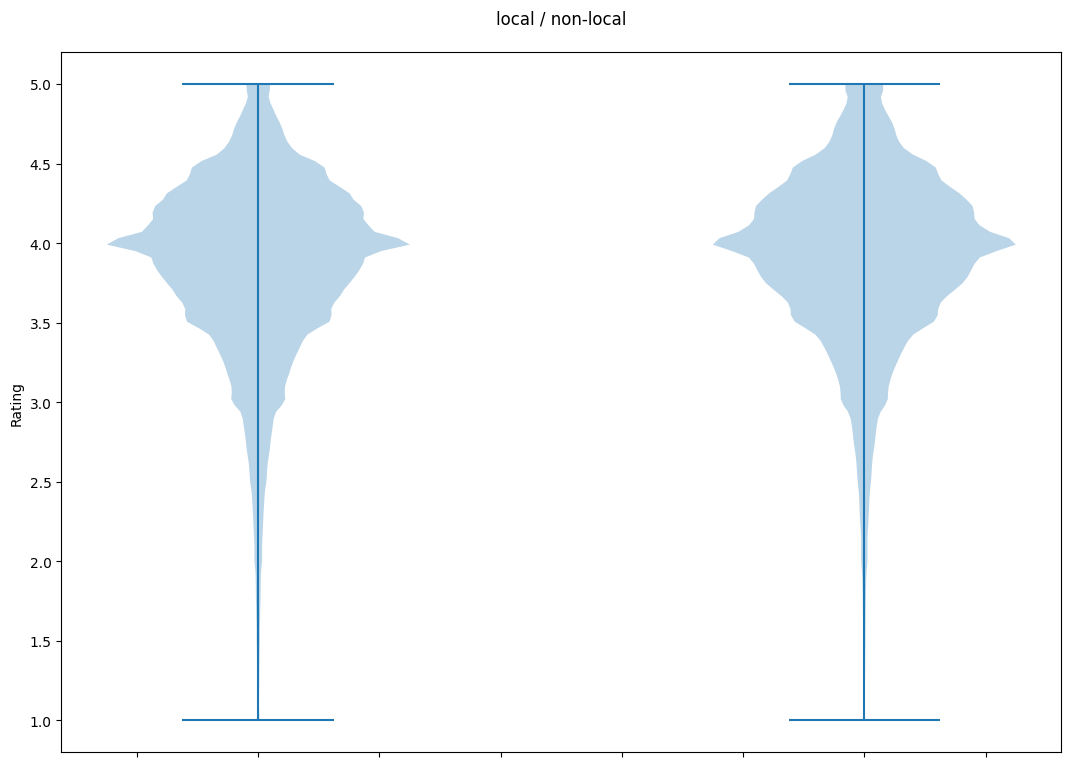

neighbout / non-neighbout

neighbout mean:     3.848
Non-neighbout mean: 3.861
p-value of t-test: 2.512E-30



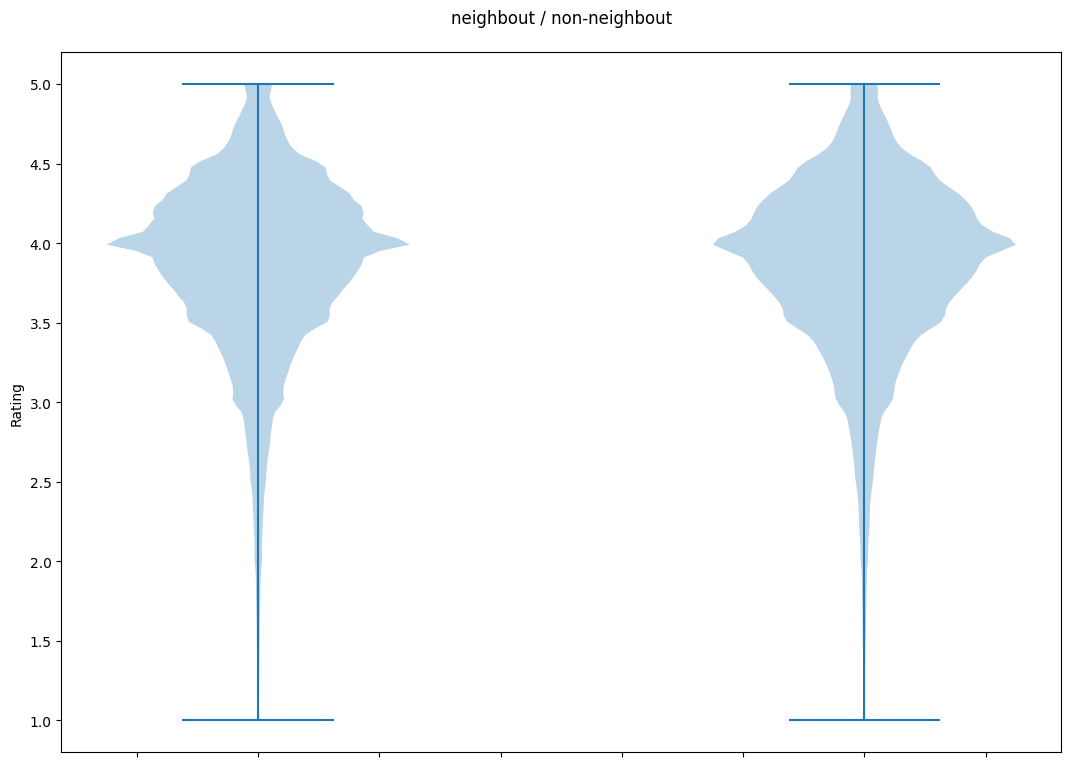

dry / non-dry

dry mean:     3.849
Non-dry mean: 3.86
p-value of t-test: 3.008E-17



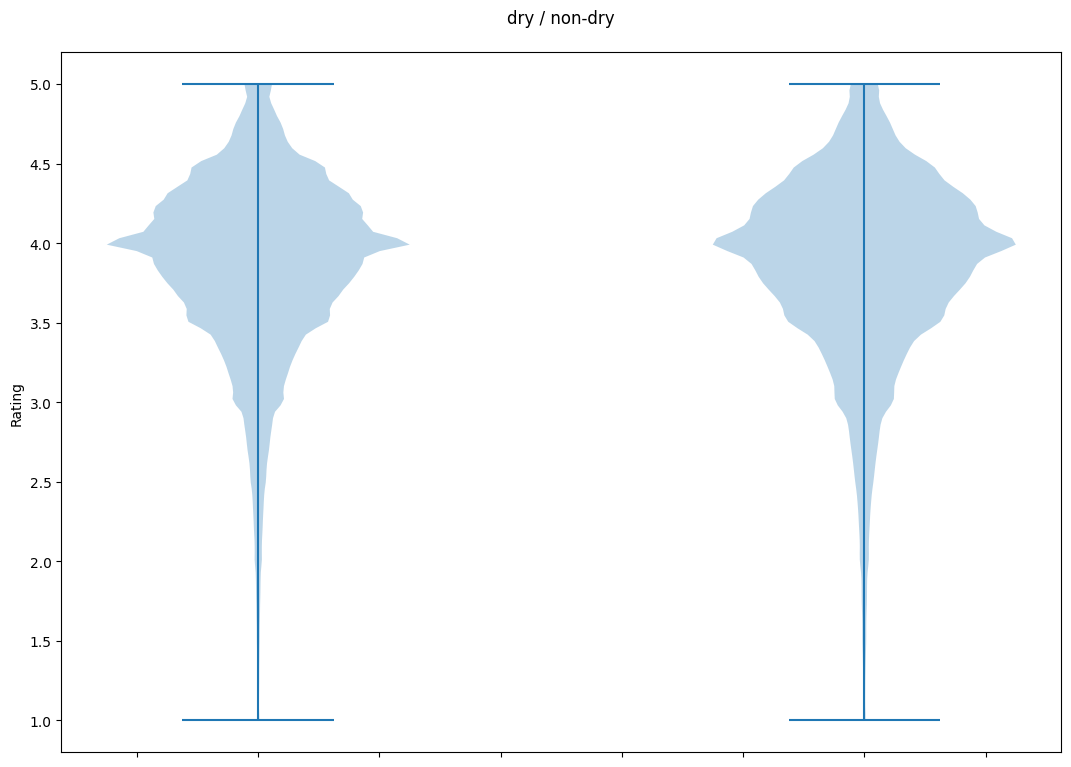

dry rating wet / non-dry rating wet

dry rating wet mean:     3.845
Non-dry rating wet mean: 3.86
p-value of t-test: 1.049E-26



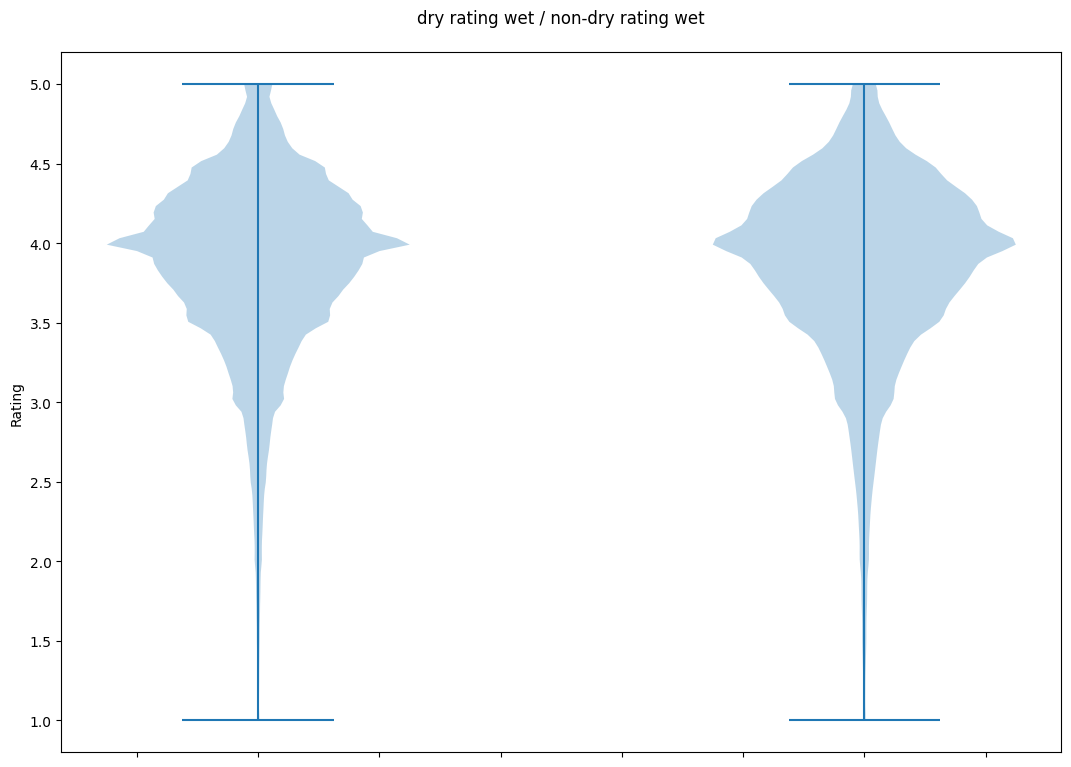

In [131]:
for (att, nm) in {
                    'local_review': 'local',
                    'neighbour_review': 'neighbour',
                    'dry_state': 'dry',
                    'dry_rating_wet': 'dry rating wet',
                 }.items():
    compare(attribute=att, name=nm, plot=True)